# Eternals Review - Sentiment Analysis

In [1]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [2]:
# Creating list to append all the tweets
tweets_list=[]

# Using TwitterSearchScrape to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Eternals review since:2021-11-05 until:2021-11-07 lang:en').get_items()):
    if i>2000: # Scraping 2000 tweets
        break
    tweets_list.append([tweet.date,tweet.id,tweet.content,tweet.user.username])

# Creating a dataframe from tweet_list
df2=pd.DataFrame(tweets_list, columns=['Datetime','Tweet Id','Text','Username'])

In [3]:
df2.head()

,Datetime,Tweet Id,Text,Username
0,2021-11-06 23:58:53+00:00,1457135431745744902,Recorded a fun spoiler review discussion for #...,richbaileyjr
1,2021-11-06 23:58:47+00:00,1457135403522199553,ICYMI My review of Eternals: https://t.co/XsVK...,ObsessiveViewer
2,2021-11-06 23:58:13+00:00,1457135263868665856,My ★★★½ review of Eternals on Letterboxd https...,eaedus
3,2021-11-06 23:57:27+00:00,1457135067726237702,Non-spoiler #Eternals review\n\nhttps://t.co/z...,SnapzEnt
4,2021-11-06 23:57:01+00:00,1457134962105327619,@CTowersCBS I have not seen Eternals yet eithe...,Flyers61


In [4]:
df=df2

In [5]:
# Coverting DataFrame into CSV file

# saving the dataframe
df.to_csv(r'C:\\Users\\DELL\\Desktop\\vtr\\Sentiment\\eternals-review.csv', index=False)

## Preprocessing

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [7]:
# Removing rows with tweets which has a link for review 

df2=df2[~df2.Text.str.contains("https://")]
df2.head()

,Datetime,Tweet Id,Text,Username
4,2021-11-06 23:57:01+00:00,1457134962105327619,@CTowersCBS I have not seen Eternals yet eithe...,Flyers61
5,2021-11-06 23:56:47+00:00,1457134901606719491,So not sure where all these bad reviews are co...,julesvandergram
6,2021-11-06 23:56:42+00:00,1457134879305502720,eternals was really good in my opinion?? no id...,losparanoias_
8,2021-11-06 23:56:05+00:00,1457134726385266689,Eternals review: should have been a TV show. A...,heysawbones
9,2021-11-06 23:55:05+00:00,1457134475574394885,"Genuinely baffled at the negative reviews, I r...",rosegoldhighway


In [8]:
# Reseting the shuffled index

df2=df2.reset_index()
df2.head()

,index,Datetime,Tweet Id,Text,Username
0,4,2021-11-06 23:57:01+00:00,1457134962105327619,@CTowersCBS I have not seen Eternals yet eithe...,Flyers61
1,5,2021-11-06 23:56:47+00:00,1457134901606719491,So not sure where all these bad reviews are co...,julesvandergram
2,6,2021-11-06 23:56:42+00:00,1457134879305502720,eternals was really good in my opinion?? no id...,losparanoias_
3,8,2021-11-06 23:56:05+00:00,1457134726385266689,Eternals review: should have been a TV show. A...,heysawbones
4,9,2021-11-06 23:55:05+00:00,1457134475574394885,"Genuinely baffled at the negative reviews, I r...",rosegoldhighway


In [9]:
# Dropping index column

df2.drop(['index'],axis=1,inplace=True)

In [10]:
df2.shape

(1123, 4)

877 rows are dropped because of review links in tweets.

In [11]:
# Converting all characters of the tweets to lower case

df2['Text']=df2['Text'].str.lower()
df2.head()

,Datetime,Tweet Id,Text,Username
0,2021-11-06 23:57:01+00:00,1457134962105327619,@ctowerscbs i have not seen eternals yet eithe...,Flyers61
1,2021-11-06 23:56:47+00:00,1457134901606719491,so not sure where all these bad reviews are co...,julesvandergram
2,2021-11-06 23:56:42+00:00,1457134879305502720,eternals was really good in my opinion?? no id...,losparanoias_
3,2021-11-06 23:56:05+00:00,1457134726385266689,eternals review: should have been a tv show. a...,heysawbones
4,2021-11-06 23:55:05+00:00,1457134475574394885,"genuinely baffled at the negative reviews, i r...",rosegoldhighway


In [12]:
# Removes patterns in the input text

def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

In [13]:
# Removing eternals word from the Tweets because it repeats in every tweet

df2['Text_1']=np.vectorize(remove_pattern)(df2['Text'],"eternals")

In [14]:
df2.head()

,Datetime,Tweet Id,Text,Username,Text_1
0,2021-11-06 23:57:01+00:00,1457134962105327619,@ctowerscbs i have not seen eternals yet eithe...,Flyers61,@ctowerscbs i have not seen yet either but it...
1,2021-11-06 23:56:47+00:00,1457134901606719491,so not sure where all these bad reviews are co...,julesvandergram,so not sure where all these bad reviews are co...
2,2021-11-06 23:56:42+00:00,1457134879305502720,eternals was really good in my opinion?? no id...,losparanoias_,was really good in my opinion?? no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,eternals review: should have been a tv show. a...,heysawbones,review: should have been a tv show. a waste o...
4,2021-11-06 23:55:05+00:00,1457134475574394885,"genuinely baffled at the negative reviews, i r...",rosegoldhighway,"genuinely baffled at the negative reviews, i r..."


In [15]:
# Dropping the original column

df2.drop(['Text'],axis=1,inplace=True)

In [16]:
# Removing word 'movie' from the Tweets because it repeats in almost all tweets.

df2['Text_2']=np.vectorize(remove_pattern)(df2['Text_1'],"movie")

In [17]:
df2.head()

,Datetime,Tweet Id,Username,Text_1,Text_2
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,@ctowerscbs i have not seen yet either but it...,@ctowerscbs i have not seen yet either but it...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad reviews are co...,so not sure where all these bad reviews are co...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion?? no idea why a...,was really good in my opinion?? no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,review: should have been a tv show. a waste o...,review: should have been a tv show. a waste o...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,"genuinely baffled at the negative reviews, i r...","genuinely baffled at the negative reviews, i r..."


In [18]:
# Dropping the 'Text_1' column

df2.drop(['Text_1'],axis=1,inplace=True)

In [19]:
# Removing word 'film' from the Tweets because it repeats in some of the tweets and it is not necesary

df2['Text_3']=np.vectorize(remove_pattern)(df2['Text_2'],"film")

In [20]:
df2.head()

,Datetime,Tweet Id,Username,Text_2,Text_3
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,@ctowerscbs i have not seen yet either but it...,@ctowerscbs i have not seen yet either but it...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad reviews are co...,so not sure where all these bad reviews are co...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion?? no idea why a...,was really good in my opinion?? no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,review: should have been a tv show. a waste o...,review: should have been a tv show. a waste o...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,"genuinely baffled at the negative reviews, i r...","genuinely baffled at the negative reviews, i r..."


In [21]:
# Dropping the Text_2 column

df2.drop(['Text_2'],axis=1,inplace=True)

In [22]:
# Removing eternals word from the review because it repeats in every tweet

df2['Text_4']=np.vectorize(remove_pattern)(df2['Text_3'],"review")

In [23]:
df2.head()

,Datetime,Tweet Id,Username,Text_3,Text_4
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,@ctowerscbs i have not seen yet either but it...,@ctowerscbs i have not seen yet either but it...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad reviews are co...,so not sure where all these bad s are coming f...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion?? no idea why a...,was really good in my opinion?? no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,review: should have been a tv show. a waste o...,: should have been a tv show. a waste of ange...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,"genuinely baffled at the negative reviews, i r...","genuinely baffled at the negative s, i really ..."


In [24]:
# Dropping the Text_3 column

df2.drop(['Text_3'],axis=1,inplace=True)

In [25]:
# Removes Twitter handles (@user)

df2['Text_5']=np.vectorize(remove_pattern)(df2['Text_4'],"@[\w]*")

In [26]:
df2.head()

,Datetime,Tweet Id,Username,Text_4,Text_5
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,@ctowerscbs i have not seen yet either but it...,i have not seen yet either but it seems like...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad s are coming f...,so not sure where all these bad s are coming f...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion?? no idea why a...,was really good in my opinion?? no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,: should have been a tv show. a waste of ange...,: should have been a tv show. a waste of ange...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,"genuinely baffled at the negative s, i really ...","genuinely baffled at the negative s, i really ..."


In [27]:
# Dropping the Text_4 column

df2.drop(['Text_4'],axis=1,inplace=True)

In [28]:
# Removes hashtag words (#word)

df2['Text_6']=np.vectorize(remove_pattern)(df2['Text_5'],"#[\w]*")

In [29]:
df2.head()

,Datetime,Tweet Id,Username,Text_5,Text_6
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,i have not seen yet either but it seems like...,i have not seen yet either but it seems like...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad s are coming f...,so not sure where all these bad s are coming f...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion?? no idea why a...,was really good in my opinion?? no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,: should have been a tv show. a waste of ange...,: should have been a tv show. a waste of ange...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,"genuinely baffled at the negative s, i really ...","genuinely baffled at the negative s, i really ..."


In [30]:
# Dropping the Text_5 column

df2.drop(['Text_5'],axis=1,inplace=True)

In [31]:
# Remove Special Characters,numbers and punctuations.

df2['Text_7']=df2['Text_6'].str.replace("[^a-zA-Z#]"," ")

<ipython-input-31-bbc4b50dd046>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Text_7']=df2['Text_6'].str.replace("[^a-zA-Z#]"," ")


In [32]:
df2.head()

,Datetime,Tweet Id,Username,Text_6,Text_7
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,i have not seen yet either but it seems like...,i have not seen yet either but it seems like...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad s are coming f...,so not sure where all these bad s are coming f...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion?? no idea why a...,was really good in my opinion no idea why a...
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,: should have been a tv show. a waste of ange...,should have been a tv show a waste of ange...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,"genuinely baffled at the negative s, i really ...",genuinely baffled at the negative s i really ...


In [33]:
# Dropping the Text_6 column

df2.drop(['Text_6'],axis=1,inplace=True)

In [34]:
# Removings words whose length is less than 3

df2['final_tweet']=df2['Text_7'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [35]:
df2.head()

,Datetime,Tweet Id,Username,Text_7,final_tweet
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,i have not seen yet either but it seems like...,have seen either seems like critics audience v...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,so not sure where all these bad s are coming f...,sure where these coming from because kind love...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,was really good in my opinion no idea why a...,really good opinion idea those watching
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,should have been a tv show a waste of ange...,should have been show waste angelina jolie fac...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,genuinely baffled at the negative s i really ...,genuinely baffled negative really liked visual...


In [36]:
# Dropping the Text_7 column

df2.drop(['Text_7'],axis=1,inplace=True)

## Labeling the tweets(positive or negative) using Hugging face

In [37]:
df2.head()

,Datetime,Tweet Id,Username,final_tweet
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,have seen either seems like critics audience v...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,sure where these coming from because kind love...
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,really good opinion idea those watching
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,should have been show waste angelina jolie fac...
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,genuinely baffled negative really liked visual...


In [38]:
# Creating new columns for labeling

df2['Label']= ""
df2['Score']= np.nan

df2.head()

,Datetime,Tweet Id,Username,final_tweet,Label,Score
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,have seen either seems like critics audience v...,,NaN
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,sure where these coming from because kind love...,,NaN
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,really good opinion idea those watching,,NaN
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,should have been show waste angelina jolie fac...,,NaN
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,genuinely baffled negative really liked visual...,,NaN


In [39]:
from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

results = sentiment_classifier(df2['final_tweet'].tolist())
i=0

for result in results:
    print(result)
    # result will be in the form of dictionary with label and scores as keys.
    df2.iat[i, df2.columns.get_loc('Label')]=result['label'] # Assigning label to each row 
    df2.iat[i, df2.columns.get_loc('Score')]=result['score'] # Assigning label_score to each row 
    i=i+1 # Counter for iterating through rows

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


{'label': 'NEGATIVE', 'score': 0.863332986831665}
{'label': 'POSITIVE', 'score': 0.9971452355384827}
{'label': 'POSITIVE', 'score': 0.9995428323745728}
{'label': 'NEGATIVE', 'score': 0.9991028308868408}
{'label': 'POSITIVE', 'score': 0.9940209984779358}
{'label': 'POSITIVE', 'score': 0.9993871450424194}
{'label': 'POSITIVE', 'score': 0.9998509883880615}
{'label': 'NEGATIVE', 'score': 0.9284309148788452}
{'label': 'POSITIVE', 'score': 0.9893261194229126}
{'label': 'POSITIVE', 'score': 0.997032642364502}
{'label': 'NEGATIVE', 'score': 0.9993294477462769}
{'label': 'POSITIVE', 'score': 0.9997292160987854}
{'label': 'POSITIVE', 'score': 0.9998399019241333}
{'label': 'NEGATIVE', 'score': 0.8407052159309387}
{'label': 'NEGATIVE', 'score': 0.9987127780914307}
{'label': 'POSITIVE', 'score': 0.9995818734169006}
{'label': 'POSITIVE', 'score': 0.9994733929634094}
{'label': 'POSITIVE', 'score': 0.998894989490509}
{'label': 'POSITIVE', 'score': 0.9995102882385254}
{'label': 'NEGATIVE', 'score': 0.9

In [40]:
df2.head()

,Datetime,Tweet Id,Username,final_tweet,Label,Score
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,have seen either seems like critics audience v...,NEGATIVE,0.863333
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,sure where these coming from because kind love...,POSITIVE,0.997145
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,really good opinion idea those watching,POSITIVE,0.999543
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,should have been show waste angelina jolie fac...,NEGATIVE,0.999103
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,genuinely baffled negative really liked visual...,POSITIVE,0.994021


In [41]:
# We can see for some rows, the score is less because the tranformer is not sure about its label
# So we can filter out the rows with less label_score

df2 = df2[df2['Score'] >= 0.75] # Rows with score greater than 0.75.

In [42]:
df2.shape

(1040, 6)

83 rows were having less than 0.75 label_score. Hence dropped.

In [43]:
# Reseting the shuffled index

df2=df2.reset_index()
df2.head()

,index,Datetime,Tweet Id,Username,final_tweet,Label,Score
0,0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,have seen either seems like critics audience v...,NEGATIVE,0.863333
1,1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,sure where these coming from because kind love...,POSITIVE,0.997145
2,2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,really good opinion idea those watching,POSITIVE,0.999543
3,3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,should have been show waste angelina jolie fac...,NEGATIVE,0.999103
4,4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,genuinely baffled negative really liked visual...,POSITIVE,0.994021


In [44]:
# Dropping index column

df2.drop(['index'],axis=1,inplace=True)

In [45]:
# Individual words considered as Tokens

tokenized_tweet=df2['final_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [have, seen, either, seems, like, critics, aud...
1    [sure, where, these, coming, from, because, ki...
2       [really, good, opinion, idea, those, watching]
3    [should, have, been, show, waste, angelina, jo...
4    [genuinely, baffled, negative, really, liked, ...
Name: final_tweet, dtype: object

In [46]:
# Making a Stop Words list
nltk.download('stopwords')

stopwords= nltk.corpus.stopwords.words('english')
stopwords[0:15]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [47]:
# Removal of Stop Words

def rem_stop(tokenized_txt):
    txt_clean=[word for word in tokenized_txt if word not in stopwords]
    return txt_clean

In [48]:
tokenized_tweet=tokenized_tweet.apply(lambda x: rem_stop(x))
tokenized_tweet.head()

0    [seen, either, seems, like, critics, audience,...
1    [sure, coming, kind, loved, marvel, angelinajo...
2              [really, good, opinion, idea, watching]
3           [show, waste, angelina, jolie, face, care]
4    [genuinely, baffled, negative, really, liked, ...
Name: final_tweet, dtype: object

In [49]:
# Stem the words

from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [seen, either, seem, like, critic, audienc, va...
1       [sure, come, kind, love, marvel, angelinajoli]
2                 [realli, good, opinion, idea, watch]
3             [show, wast, angelina, joli, face, care]
4    [genuin, baffl, neg, realli, like, visual, stu...
Name: final_tweet, dtype: object

In [50]:
# Combine words into single sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df2['clean_tweet']=tokenized_tweet
df2.head()

,Datetime,Tweet Id,Username,final_tweet,Label,Score,clean_tweet
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,have seen either seems like critics audience v...,NEGATIVE,0.863333,seen either seem like critic audienc vastli di...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,sure where these coming from because kind love...,POSITIVE,0.997145,sure come kind love marvel angelinajoli
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,really good opinion idea those watching,POSITIVE,0.999543,realli good opinion idea watch
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,should have been show waste angelina jolie fac...,NEGATIVE,0.999103,show wast angelina joli face care
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,genuinely baffled negative really liked visual...,POSITIVE,0.994021,genuin baffl neg realli like visual stun act c...


In [51]:
# Dropping final_tweet column

df2.drop(['final_tweet'],axis=1,inplace=True)

In [52]:
df2.head()

,Datetime,Tweet Id,Username,Label,Score,clean_tweet
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,NEGATIVE,0.863333,seen either seem like critic audienc vastli di...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,POSITIVE,0.997145,sure come kind love marvel angelinajoli
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,POSITIVE,0.999543,realli good opinion idea watch
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,NEGATIVE,0.999103,show wast angelina joli face care
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,POSITIVE,0.994021,genuin baffl neg realli like visual stun act c...


# EDA

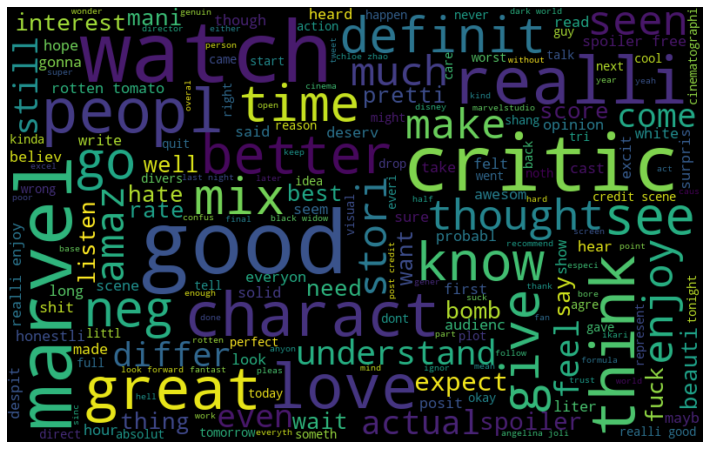

In [53]:
# Visualize the frequent words

all_words=" ".join([sentence for sentence in df2['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=45, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

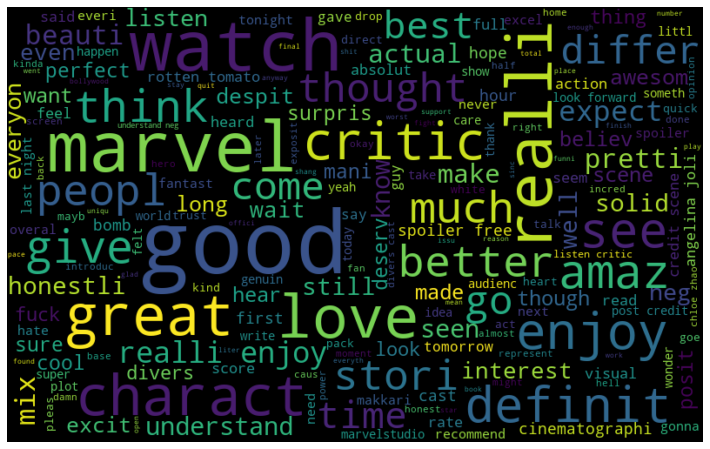

In [54]:
#frequent words visualization for positive reviews
all_words=" ".join([sentence for sentence in df2['clean_tweet'][df2['Label']=='POSITIVE']])

wordcloud=WordCloud(width=800, height=500, random_state=45, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

These are the positive words present in positive reviews.

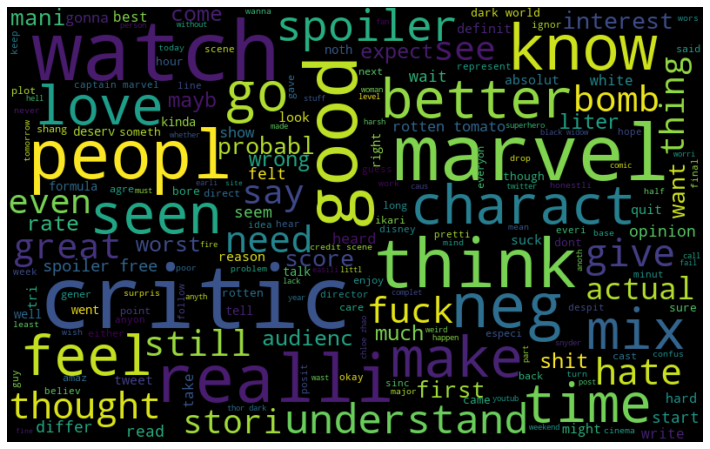

In [55]:
#frequent words visualization for negative reviews
all_words=" ".join([sentence for sentence in df2['clean_tweet'][df2['Label']=='NEGATIVE']])

wordcloud=WordCloud(width=800, height=500, random_state=45, max_font_size=100).generate(all_words)

# plotting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

These are the negative words present in negative reviews.

In [56]:
# Extracting Positive/Negative words from tweets

def extract(tweets,val):
    pos_words=[]
    neg_words=[]
    if val==1:
        for tweet in tweets:
            p=tweet.split()
            pos_words.extend(p) # appending list to list
        return pos_words
    else:
        for tweet in tweets:
            n=tweet.split()
            neg_words.extend(n) # appending list to list
        return neg_words

In [57]:
# Extracting all the words from Positive Review 
positive_words=extract(df2['clean_tweet'][df2['Label']=='POSITIVE'],1)

# Extracting all the words from Negative Review 
negative_words=extract(df2['clean_tweet'][df2['Label']=='NEGATIVE'],0)

In [58]:
positive_words

['sure',
 'come',
 'kind',
 'love',
 'marvel',
 'angelinajoli',
 'realli',
 'good',
 'opinion',
 'idea',
 'watch',
 'genuin',
 'baffl',
 'neg',
 'realli',
 'like',
 'visual',
 'stun',
 'act',
 'chemistri',
 'amaz',
 'includ',
 'think',
 'hate',
 'direct',
 'toward',
 'divers',
 'realli',
 'great',
 'baffl',
 'good',
 'heart',
 'use',
 'see',
 'realli',
 'recommend',
 'thank',
 'critic',
 'lower',
 'expect',
 'teach',
 'mean',
 'much',
 'perfect',
 'definit',
 'great',
 'lot',
 'surpris',
 'interest',
 'charact',
 'thing',
 'taught',
 'trust',
 'barri',
 'keoghan',
 'care',
 'chlo',
 'zhao',
 'made',
 'someth',
 'special',
 'good',
 'watch',
 'great',
 'angelina',
 'joli',
 'richard',
 'madden',
 'fuck',
 'beauti',
 'marvel',
 'studio',
 'retweet',
 'posit',
 'super',
 'funni',
 'hear',
 'poor',
 'expect',
 'pleasantli',
 'surpris',
 'flaw',
 'overal',
 'pretti',
 'solid',
 'pretti',
 'good',
 'honestli',
 'know',
 'get',
 'mani',
 'definit',
 'marvel',
 'worst',
 'charact',
 'moment',


In [59]:
negative_words

['seen',
 'either',
 'seem',
 'like',
 'critic',
 'audienc',
 'vastli',
 'differ',
 'site',
 'show',
 'wast',
 'angelina',
 'joli',
 'face',
 'care',
 'thought',
 'perfectli',
 'fine',
 'think',
 'weird',
 'final',
 'start',
 'get',
 'neg',
 'think',
 'watch',
 'stupidest',
 'made',
 'flaw',
 'tri',
 'cram',
 'much',
 'enjoy',
 'nonetheless',
 'kind',
 'phase',
 'ultron',
 'futur',
 'rather',
 'self',
 'contain',
 'stori',
 'chloe',
 'zhao',
 'wrong',
 'eye',
 'spoiler',
 'free',
 'critic',
 'grumpi',
 'druig',
 'makkari',
 'children',
 'take',
 'question',
 'time',
 'make',
 'video',
 'stick',
 'wheel',
 'time',
 'content',
 'bomb',
 'felt',
 'like',
 'whiff',
 'bland',
 'joyless',
 'littl',
 'reason',
 'like',
 'reson',
 'charact',
 'outsid',
 'sersi',
 'dour',
 'overcam',
 'least',
 'give',
 'cool',
 'shit',
 'lack',
 'well',
 'okay',
 'lemm',
 'rotten',
 'bull',
 'caus',
 'realli',
 'wasnt',
 'grace',
 'tyron',
 'magnu',
 'blatant',
 'homophobia',
 'call',
 'woke',
 'kiss',
 'back'

In [60]:
freq=nltk.FreqDist(positive_words)
d= pd.DataFrame({'Positive words':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Positive words,Count
0,sure,13
1,come,27
2,kind,7
3,love,59
4,marvel,83


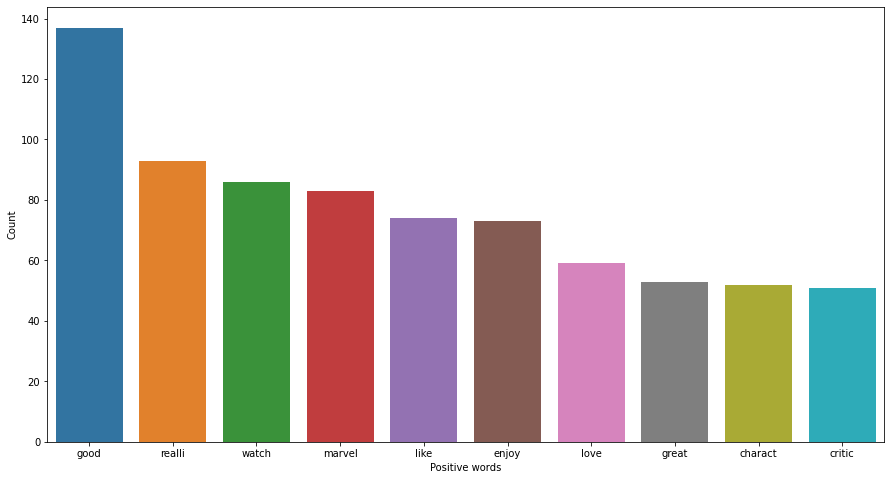

In [61]:
# Plotting Top10 positive words

d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='Positive words',y='Count')
plt.show()

In [62]:
freq=nltk.FreqDist(negative_words)
d= pd.DataFrame({'Negative words':list(freq.keys()),
               'Count':list(freq.values())})
d.head()

,Negative words,Count
0,seen,31
1,either,9
2,seem,15
3,like,112
4,critic,83


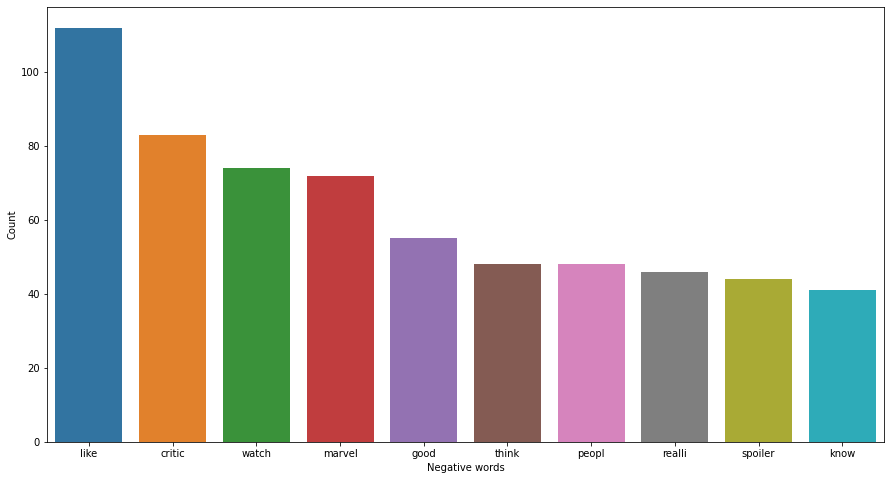

In [63]:
# Plotting Top10 negative words

d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='Negative words',y='Count')
plt.show()

## Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df2['Label']=lab.fit_transform(df2['Label'].values.reshape(-1,1))
df2.head()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Datetime,Tweet Id,Username,Label,Score,clean_tweet
0,2021-11-06 23:57:01+00:00,1457134962105327619,Flyers61,0,0.863333,seen either seem like critic audienc vastli di...
1,2021-11-06 23:56:47+00:00,1457134901606719491,julesvandergram,1,0.997145,sure come kind love marvel angelinajoli
2,2021-11-06 23:56:42+00:00,1457134879305502720,losparanoias_,1,0.999543,realli good opinion idea watch
3,2021-11-06 23:56:05+00:00,1457134726385266689,heysawbones,0,0.999103,show wast angelina joli face care
4,2021-11-06 23:55:05+00:00,1457134475574394885,rosegoldhighway,1,0.994021,genuin baffl neg realli like visual stun act c...


   ## Feature Selection

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df2['clean_tweet'])

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df2['Label'], random_state=42, test_size=0.2)

## Model Training

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import accuracy_score,classification_report

In [68]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
lr_clas=classification_report(y_test,pred)
acc=accuracy_score(y_test,pred)
print(lr_clas)

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        97
           1       0.75      0.71      0.73       111

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208



In [69]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,pred)
con

array([[70, 27],
       [32, 79]], dtype=int64)

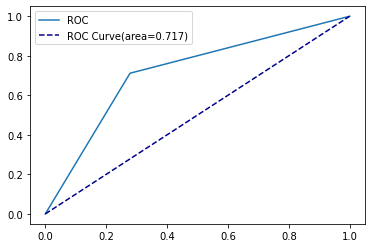

In [70]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds =roc_curve(y_test, pred)
area_under_curve=roc_auc_score(y_test, pred)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()